In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
file_name = '../data/copper_historical.xlsx'
df = pd.read_excel(file_name)
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/copper_historical.xlsx'

In [10]:
copper_tickers = df.drop_duplicates('Instrument')
copper_tickers.to_excel('copper_tickers.xlsx')

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df

,Instrument,Date,Cash from Operating Activities,Total Common Shares Outstanding,"Return on Capital, Total LT Capital, Percent","Hist Tot Debt/Comm Eqty, %",Year
0,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
1,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
2,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
3,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
4,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
...,...,...,...,...,...,...,...
2819,CPER.V,2020-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,2020.0
2820,CPER.V,2020-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,2020.0
2821,CPER.V,2020-12-31 00:00:00+00:00,-45560.0,66225370.0,NaN,0.00000,2020.0
2822,CPER.V,2021-12-31 00:00:00+00:00,-2576060.0,66225370.0,-69.387874,1.06952,2021.0


In [12]:
df = df[df["Cash from Operating Activities"] != 0]
df

,Instrument,Date,Cash from Operating Activities,Total Common Shares Outstanding,"Return on Capital, Total LT Capital, Percent","Hist Tot Debt/Comm Eqty, %",Year
0,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
1,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
2,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
3,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
4,ZCCM.EUA,1998-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,1998.0
...,...,...,...,...,...,...,...
2819,CPER.V,2020-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,2020.0
2820,CPER.V,2020-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,2020.0
2821,CPER.V,2020-12-31 00:00:00+00:00,-45560.0,66225370.0,NaN,0.00000,2020.0
2822,CPER.V,2021-12-31 00:00:00+00:00,-2576060.0,66225370.0,-69.387874,1.06952,2021.0


In [13]:
grouped_df = df.groupby("Instrument")

In [14]:
df['Last OCF'] = grouped_df["Cash from Operating Activities"].shift(1)
df['Change OCF (%)'] = df['Cash from Operating Activities'] / df['Last OCF'] # Atual / Anterior

/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/2321731640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last OCF'] = grouped_df["Cash from Operating Activities"].shift(1)
/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/2321731640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change OCF (%)'] = df['Cash from Operating Activities'] / df['Last OCF'] # Atual / Anterior


In [15]:
df['Last shares'] = grouped_df['Total Common Shares Outstanding'].shift(1)
df['Change Shares (%)'] = (df['Total Common Shares Outstanding'] / df['Last shares']) # Atual / Anterior

/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/480226243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last shares'] = grouped_df['Total Common Shares Outstanding'].shift(1)
/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/480226243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change Shares (%)'] = (df['Total Common Shares Outstanding'] / df['Last shares']) # Atual / Anterior


In [16]:
df['Year of Last Data'] = df['Year'] - 1

/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/3935541095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year of Last Data'] = df['Year'] - 1


In [17]:
df = df.dropna()

In [18]:
grouped_df_year = df.groupby(["Instrument", "Year"])

In [19]:
df['Average Change OCF (%)'] = grouped_df_year['Change OCF (%)'].transform('mean')
df['Average Change Shares (%)'] = grouped_df_year['Change Shares (%)'].transform('mean')

/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/1389126751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Change OCF (%)'] = grouped_df_year['Change OCF (%)'].transform('mean')
/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/1389126751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Change Shares (%)'] = grouped_df_year['Change Shares (%)'].transform('mean')


In [20]:
ranked_df = df[['Instrument', 'Date', 'Year', 'Return on Capital, Total LT Capital, Percent', 
                'Hist Tot Debt/Comm Eqty, %', 'Average Change Shares (%)', 'Average Change OCF (%)']].copy()

In [21]:
ranked_df['ROIC Rank'] = ranked_df.groupby('Year')['Return on Capital, Total LT Capital, Percent'].rank(ascending=False)
ranked_df['Debt/Equity Rank'] = ranked_df.groupby('Year')['Hist Tot Debt/Comm Eqty, %'].rank(ascending=True)
ranked_df['Average OCF Change Rank'] = ranked_df.groupby('Year')['Average Change OCF (%)'].rank(ascending=False)
ranked_df['Average Shares Change Rank'] = ranked_df.groupby('Year')['Average Change Shares (%)'].rank(ascending=True)

In [22]:
ranked_df['Average Rank'] = ranked_df[['ROIC Rank', 'Debt/Equity Rank', 'Average OCF Change Rank', 'Average Shares Change Rank']].mean(axis=1)

In [23]:
ranked_df = ranked_df.sort_values(by=['Year', 'Average Rank'])

In [24]:
dataframes = {year: grouped_df for year, grouped_df in ranked_df.groupby('Year')}

In [25]:
df_2000 = dataframes[2000]
df_2000

,Instrument,Date,Year,"Return on Capital, Total LT Capital, Percent","Hist Tot Debt/Comm Eqty, %",Average Change Shares (%),Average Change OCF (%),ROIC Rank,Debt/Equity Rank,Average OCF Change Rank,Average Shares Change Rank,Average Rank
1065,NAFG.DE,2000-09-30 00:00:00+00:00,2000.0,30.660754,33.045410,1.000000,3.831775,1.0,11.0,5.0,6.5,5.875
2357,PUCOBRE.SN,2000-12-31 00:00:00+00:00,2000.0,12.045311,24.651088,1.000000,1.307966,6.5,7.5,9.5,6.5,7.500
2358,PUCOBRE.SN,2000-12-31 00:00:00+00:00,2000.0,12.045311,24.651088,1.000000,1.307966,6.5,7.5,9.5,6.5,7.500
556,SCCO.N,2000-12-31 00:00:00+00:00,2000.0,6.234227,29.140397,0.999253,1.778215,12.0,10.0,8.0,1.0,7.750
964,KGH.WA,2000-12-31 00:00:00+00:00,2000.0,9.653356,15.816877,1.000000,1.013223,9.0,6.0,11.0,6.5,8.125
1371,UELMI.RTS,2000-12-31 00:00:00+00:00,2000.0,22.169854,164.706733,1.000000,6.013599,3.5,21.5,2.5,6.5,8.500
1372,UELMI.RTS,2000-12-31 00:00:00+00:00,2000.0,22.169854,164.706733,1.000000,6.013599,3.5,21.5,2.5,6.5,8.500
1134,000878.SZ,2000-12-31 00:00:00+00:00,2000.0,8.597831,155.054813,1.000000,11.963004,11.0,18.0,1.0,6.5,9.125
1236,CVERDEC1.LM,2000-12-31 00:00:00+00:00,2000.0,5.666945,67.193764,1.000000,1.843484,13.0,13.0,7.0,6.5,9.875
1168,BCU.V,2000-12-31 00:00:00+00:00,2000.0,-60.396894,0.000000,1.088679,1.866142,19.0,2.5,6.0,14.0,10.375


## BACKTESTING

In [6]:
file_name = '../data/copper_prices_week.xlsx'
prices_df = pd.read_excel(file_name)
prices_df

,Instrument,Date,Close Price
0,ZCCM.EUA,1998-12-30T00:00:00Z,1.082388
1,ZCCM.EUA,1999-01-08T00:00:00Z,0.910000
2,ZCCM.EUA,1999-01-15T00:00:00Z,0.810000
3,ZCCM.EUA,1999-01-21T00:00:00Z,0.840000
4,ZCCM.EUA,1999-01-29T00:00:00Z,0.850000
...,...,...,...
66829,CPRJ.J,2023-06-30T00:00:00Z,399.000000
66830,CPRJ.J,2023-07-07T00:00:00Z,410.000000
66831,CPRJ.J,2023-07-14T00:00:00Z,420.000000
66832,CPRJ.J,2023-07-21T00:00:00Z,417.000000


In [27]:
prices_df_nan = prices_df.dropna()
prices_df_nan

,Instrument,Date,Close Price
0,ZCCM.EUA,1998-12-30T00:00:00Z,1.082388
1,ZCCM.EUA,1999-01-08T00:00:00Z,0.910000
2,ZCCM.EUA,1999-01-15T00:00:00Z,0.810000
3,ZCCM.EUA,1999-01-21T00:00:00Z,0.840000
4,ZCCM.EUA,1999-01-29T00:00:00Z,0.850000
...,...,...,...
66829,CPRJ.J,2023-06-30T00:00:00Z,399.000000
66830,CPRJ.J,2023-07-07T00:00:00Z,410.000000
66831,CPRJ.J,2023-07-14T00:00:00Z,420.000000
66832,CPRJ.J,2023-07-21T00:00:00Z,417.000000


## EACH YEAR BACKTEST

In [28]:
backtest_results = {}

In [92]:
import yfinance as yf
import matplotlib.pyplot as plt

def plot_yearly_portfolio(year):
    df_year = dataframes[year]

    total_companies = len(df_year)
    beta = 29 # Valor alterado para cada ano, a fim de se obter 15 empresas

    weights = (1 - (df_year['Average Rank'] - 1) / (total_companies - 1)) ** beta
    normalized_weights = weights / weights.sum()

    capital_allocation_percentage = normalized_weights * 100

    df_year['Capital Allocation (%)'] = capital_allocation_percentage.apply(lambda x: round(x,3))

    initial_investment = 100000 

    filtered_allocation = df_year[df_year['Capital Allocation (%)'] > 0]
    filtered_allocation['Allocation Amount'] = initial_investment / 100 * filtered_allocation['Capital Allocation (%)']

    tickers = filtered_allocation['Instrument'].to_list()
    amount = filtered_allocation['Allocation Amount'].to_list()

    dic = dict(zip(tickers, amount))

    prices_df_filtered = prices_df_nan[prices_df_nan['Instrument'].isin(tickers)]
    prices_df_filtered['Date'] = pd.to_datetime(prices_df_filtered['Date'], format='%Y-%m-%d')

    prices_df_filtered = prices_df_filtered[prices_df_filtered['Date'].dt.year == year]

    prices_df_filtered['Initial Investment'] = prices_df_filtered['Instrument'].map(dic)

    first_prices = prices_df_filtered.groupby('Instrument')['Close Price'].first()
    first_prices_dict = first_prices.to_dict()

    prices_df_filtered['First Price'] = prices_df_filtered['Instrument'].map(first_prices_dict)
    prices_df_filtered['Shares'] = prices_df_filtered['Initial Investment'] / prices_df_filtered['First Price']

    prices_df_filtered['Investment Value'] = prices_df_filtered['Close Price'] * prices_df_filtered['Shares']

    portfolio_df = prices_df_filtered.drop_duplicates(subset=['Instrument'], keep='last')

    final_portfolio_value = portfolio_df['Investment Value'].sum()

    backtest_results[year] = final_portfolio_value

    prices_df_filtered.set_index('Date', inplace=True)

    portfolio_value_by_week = prices_df_filtered.resample('W')['Investment Value'].sum().reset_index()
    
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    data = yf.download('^GSPC', start=start_date, end=end_date)

    data['Return'] = data['Close'].pct_change()
    data['Cumulative Return'] = (1 + data['Return']).cumprod()

    # Fixes the first 'Cumulative Return' to 1
    data['Cumulative Return'].iloc[0] = 1

    data['Investment Value'] = initial_investment * data['Cumulative Return']

    
    fig, ax = plt.subplots()
    ax.plot(portfolio_value_by_week['Date'], portfolio_value_by_week['Investment Value'], label='Portfolio')
    ax.plot(data.index, data['Investment Value'], label='S&P500')
    ax.set_xlabel('Date')
    ax.set_ylabel('Investment Value')
    ax.set_title(f'Portfolio Value and S&P 500 Over Time for {year}')
    ax.legend()

    plt.show()

    profitability = (final_portfolio_value - initial_investment) / initial_investment
    sp_profitability = (data['Investment Value'].iloc[-1] - initial_investment) / initial_investment  # SP500 return

    print(f"The {year} portfolio's profitability is {profitability * 100 :.2f}%.")
    print(f"The S&P 500's profitability for the year {year} is {sp_profitability * 100 :.2f}%.")
    print(f"The final portfolio value for the year {year} is ${final_portfolio_value :.2f}.")
    
    return len(portfolio_df)


/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/4120429776.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_allocation['Allocation Amount'] = initial_investment / 100 * filtered_allocation['Capital Allocation (%)']
/var/folders/4z/8f0cq10x723_s3xz_r8c50q80000gn/T/ipykernel_1153/4120429776.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df_filtered['Date'] = pd.to_datetime(prices_df_filtered['Date'], format='%Y-%m-%d')


[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


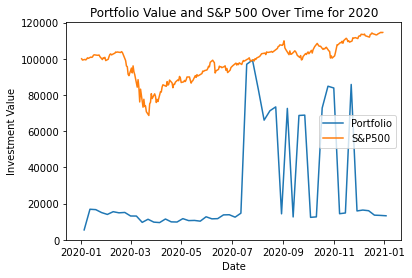

The 2020 portfolio's profitability is -14.51%.
The S&P 500's profitability for the year 2020 is 14.56%.
The final portfolio value for the year 2020 is $85489.87.


14

In [93]:
plot_yearly_portfolio(2020)